In [1]:
# Decorations
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import gmplot
import scipy.stats as stats
from config import api_key

In [2]:
# Import database
df1 = pd.read_csv('Data/housing.csv')
df2 = pd.read_csv('Data/Total.csv')
df1 = df1.dropna()

### df1(1990) Analysis

Sort and slice data to get top and bottom 5%

In [3]:
# SSort data by house value
df1 = df1.sort_values('median_house_value', ascending=False).reset_index(drop=True)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
1,-117.66,33.48,22,809,180.0,334,157,2.3846,500001,<1H OCEAN
2,-118.50,33.97,29,2737,808.0,1157,696,5.1280,500001,<1H OCEAN
3,-122.47,37.73,50,1653,252.0,641,224,10.6605,500001,NEAR OCEAN
4,-122.47,37.73,52,2151,280.0,762,274,10.7309,500001,NEAR OCEAN


In [4]:
# Slice the top 5%
top5 = df1.iloc[:round(len(df1['median_house_value'])*0.05), :].sort_values('median_house_value', ascending=True)

In [5]:
# slice the bottom 5%
bottom5 = df1.iloc[round(len(df1['median_house_value'])*0.95): len(df1['median_house_value']),:].sort_values('median_house_value', ascending=True)

Plotting Top 5% and Bottom 5% on gmap (Use gmplot package)

In [7]:
# Set the center of the map
gmap = gmplot.GoogleMapPlotter(top5['latitude'].median(),
                                   top5['longitude'].median(), 100000)
# Plot scatter points based on LatLng
gmap.scatter(top5['latitude'], top5['longitude'], '#FF0000', 
                              size = 2000, marker = False ) 
gmap.scatter(bottom5['latitude'], bottom5['longitude'], '#110870', 
                              size = 2000, marker = False ) 
# Draw out to 'Plot' folder in html format
gmap.draw("Plot/gmap.html")

Based on the plot, we can assume that the median house value is heavliy influenced by their location.

Now we clean our data and create a new dataframe with informations we need

First, we look at the relationship between income and house value

Text(0.5,1,'Income vs House Value')

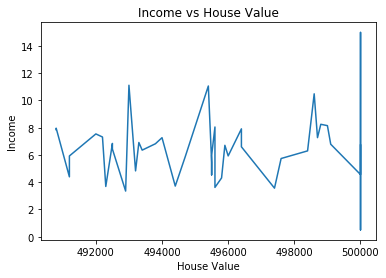

In [11]:
plt.plot(top5['median_house_value'], top5['median_income'])
plt.ylabel('Income')
plt.xlabel('House Value')
plt.title('Income vs House Value')

Above plot shows that there's no visible correlation between income and house value, since there's no specifice trending (increase nor decrease) in house value as income increase. Rather, we can see that people with lower income(for example, for income=2) live in more expensive houses. 

It is also possible that number of rooms/bedrooms are related to house value

### df2(2018) Analysis 

In [25]:
df2.head()

,Unnamed: 0,Listing ID,S,Sub Type,St#,St Name,City,MLS Area,SLC,L/C Price,...,Br/Ba,Sqft,YrBuilt,Ac/LSqft,DOM/CDOM,View YN,Pool Private YN,BAC,Contract Status Change Date,MLS
0,1,180048066,S,MANL/D,12,Via Veneto #12,CHU,NaN,NaN,"$89,000",...,"2/2,0,0,0",1000/P,2006,NaN,8-Aug,NaN,N,2500,9/14/2018,SAND
1,1,180047253,S,CONDO/A,1653,Pentecost Way #1,SD,NaN,NaN,"$158,000",...,"1/1,0,0,0",668/A,1980,NaN,1-Jan,NaN,N,2.5,9/7/2018,SAND
2,1,180046958,S,CONDO/A,6101,Adelaide Ave #107,SD,NaN,NaN,"$168,250",...,"0/1,0,0,0",299/A,1984/ASR,NaN,5-May,NaN,N,2.5,9/14/2018,SAND
3,1,180047651,S,CONDO/A,589 N,Johnson #137,ELC,NaN,NaN,"$175,000",...,"2/1,0,0,0",883/,1980,NaN,4-Apr,NaN,N,500,8/28/2018,SAND
4,1,180051931,S,SFR,3138,Roadrunner,BSPG,NaN,NaN,"$190,000",...,"2/2,0,0,0",1356/A,1986,NaN,0/135,NaN,N,3,9/14/2018,SAND


In [26]:
# Keep only the columns that are useful 
df2 = df2[['Sub Type', 'St#', 'St Name', 'City', 'L/C Price', 'Br/Ba', 'YrBuilt']]
df2.head()
#df2 = df2.drop(on=0)

,Sub Type,St#,St Name,City,L/C Price,Br/Ba,YrBuilt
0,MANL/D,12,Via Veneto #12,CHU,"$89,000","2/2,0,0,0",2006
1,CONDO/A,1653,Pentecost Way #1,SD,"$158,000","1/1,0,0,0",1980
2,CONDO/A,6101,Adelaide Ave #107,SD,"$168,250","0/1,0,0,0",1984/ASR
3,CONDO/A,589 N,Johnson #137,ELC,"$175,000","2/1,0,0,0",1980
4,SFR,3138,Roadrunner,BSPG,"$190,000","2/2,0,0,0",1986


In [27]:
yr_blt = df2.loc[:, 'YrBuilt'].str.split('/', expand=True)[0]
yr_blt = pd.DataFrame(yr_blt)
yr_blt = yr_blt.fillna(0)

In [28]:
df2['Age'] = ''
count = 0
for i in yr_blt[0]:
        i = 2018 - int(i)
        df2['Age'][count] = i
        count += 1
df2.head()

,Sub Type,St#,St Name,City,L/C Price,Br/Ba,YrBuilt,Age
0,MANL/D,12,Via Veneto #12,CHU,"$89,000","2/2,0,0,0",2006,12
1,CONDO/A,1653,Pentecost Way #1,SD,"$158,000","1/1,0,0,0",1980,38
2,CONDO/A,6101,Adelaide Ave #107,SD,"$168,250","0/1,0,0,0",1984/ASR,34
3,CONDO/A,589 N,Johnson #137,ELC,"$175,000","2/1,0,0,0",1980,38
4,SFR,3138,Roadrunner,BSPG,"$190,000","2/2,0,0,0",1986,32


In [29]:
df2['house_price'] = df2.loc[:, 'L/C Price'].str.split('$', expand=True)[1] 

In [30]:
df2.head()

,Sub Type,St#,St Name,City,L/C Price,Br/Ba,YrBuilt,Age,house_price
0,MANL/D,12,Via Veneto #12,CHU,"$89,000","2/2,0,0,0",2006,12,"89,000"
1,CONDO/A,1653,Pentecost Way #1,SD,"$158,000","1/1,0,0,0",1980,38,"158,000"
2,CONDO/A,6101,Adelaide Ave #107,SD,"$168,250","0/1,0,0,0",1984/ASR,34,"168,250"
3,CONDO/A,589 N,Johnson #137,ELC,"$175,000","2/1,0,0,0",1980,38,"175,000"
4,SFR,3138,Roadrunner,BSPG,"$190,000","2/2,0,0,0",1986,32,"190,000"


In [17]:
df2_by_value = df2.set_index("L/C Price")
df2_by_value = df2_by_value.reset_index()
df2_by_value.head()

,L/C Price,Sub Type,St#,St Name,City,Br/Ba,YrBuilt,Age,house_price
0,"$89,000",MANL/D,12,Via Veneto #12,CHU,"2/2,0,0,0",2006,12,"89,000"
1,"$158,000",CONDO/A,1653,Pentecost Way #1,SD,"1/1,0,0,0",1980,38,"158,000"
2,"$168,250",CONDO/A,6101,Adelaide Ave #107,SD,"0/1,0,0,0",1984/ASR,34,"168,250"
3,"$175,000",CONDO/A,589 N,Johnson #137,ELC,"2/1,0,0,0",1980,38,"175,000"
4,"$190,000",SFR,3138,Roadrunner,BSPG,"2/2,0,0,0",1986,32,"190,000"


### Ploting on Gmap

In [50]:
#for i in df2['St Name']:
#target_url = f"http://maps.googleapis.com/maps/api/geocode/jason?address=Via+Veneto+CHU&key={api_key}"
target_url = 'https://maps.googleapis.com/maps/api/geocode/xml?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key={api_key}'
geo_data = requests.get(target_url)

In [46]:
print(geo_data)

<Response [200]>
